In [155]:
import os
import json

import pandas as pd

In [156]:
df = pd.read_csv(r"C:\Users\Ong Hui Ling\Dropbox\PC\Documents\Github\Aspect-Based-Sentiment-Analysis\Dataset\Output\segment_level_predictions.csv")
df = df[df['aspect'] != 'GENERAL'].copy()

# STAGE 1: Data Preparation: Restaurant Subcategory Re-categorization
**Rationale**: The existing sub_category field (restaurant, cafe_bakery, bar_nightlife, restaurant_general, other) lacks granularity for meaningful Malaysian gastronomy tourism insights. We recategorize based on Restaurant_Name to capture cultural dining determinants:
- 'mamak'
- 'hawker_street_food'
- 'fine_dining'
- 'bar_club'
- 'chain_fast_food'
- 'chinese_restaurant'
- 'malay_restaurant'
- 'indian_restaurant'
- 'western_international'
- 'cafe'
- 'seafood'
- 'other'

In [ ]:
def recategorize_restaurant_subcategory(restaurant_name):
    """
    Recategorize restaurants into culturally-aware Malaysian subcategories based on 
    restaurant name patterns.
    
    Args:
        restaurant_name (str): The name of the restaurant
        
    Returns:
        str: One of the following categories:
            - 'mamak'
            - 'hawker_street_food'
            - 'fine_dining'
            - 'bar_club'
            - 'chain_fast_food'
            - 'chinese_restaurant'
            - 'malay_restaurant'
            - 'indian_restaurant'
            - 'western_international'
            - 'cafe'
            - 'seafood'
            - 'other'
    
    Methodology:
        Uses keyword matching with Malaysian dining culture context to classify 
        establishments. Priority given to specific identifiers (e.g., "Mamak", 
        "Restoran", brand names like "McDonald's").
    """
    if pd.isna(restaurant_name):
        return 'other'
    
    name_lower = str(restaurant_name).lower()
    
    # Define categorization rules with cultural context
    
    # 1. MAMAK (24-hour Indian-Muslim eateries - critical for Malaysian food culture)
    mamak_keywords = [
        'mamak', 'pelita', 'kayu', 'transfer road', 'ali maju', 
        'al-azhar', 'beratur', 'penang kayu', 'restoran kayu'
    ]
    if any(keyword in name_lower for keyword in mamak_keywords):
        return 'mamak'
    
    # 2. CHAIN FAST FOOD (International & Local QSR Chains)
    chain_keywords = [
        "mcdonald", "kfc", "burger king", "subway", "pizza hut", "domino", 
        "a&w", "kenny rogers", "texas chicken", "carl's jr", "popeyes",
        "starbucks", "secret recipe", "old town", "papa", "marrybrown",
        "nando's", "the chicken rice shop", "kim gary", "sushi king",
        "sakae", "ichiban", "boat noodle", "tealive", "chatime",
        "madam kwan", "dragon-i", "din tai fung", "dian xiao er",
        "crystal jade", "paradise dynasty", "tim ho wan", "din tai",
        "tony roma", "chili's", "tgi friday", "hard rock", "mixue", "chagee",
        "chatime", "koi", "kyochon", "kfry", "beutea", "uncle don", "4fingers",
        "taco bell", "five guys", "the alley"
    ]
    if any(keyword in name_lower for keyword in chain_keywords):
        return 'chain_fast_food'
    
    # 3. FINE DINING (Upscale establishments - expensive, high class)
    fine_dining_keywords = [
        'grill', 'steakhouse', 'bistro', 'brasserie', 'fine dining',
        'chef', 'table', 'signature', 'pavilion', 'hilton', 'marriott',
        'shangri-la', 'mandarin', 'sheraton', 'grand', 'royal', 'palace',
        'altitude', 'marini', 'cilantro', 'dewakan', 'beta kl',
        'banquet', 'ballroom', 'fine', 'dining room',
        'wagyu', 'prime', 'angus','fusion', 'contemporary', 'modern',
        'gastro', 'experimental', 'nouvelle','omakase', 'omakaza'
    ]
    if any(keyword in name_lower for keyword in fine_dining_keywords):
        return 'fine_dining'
    
    # 4. BAR / CLUB (Bars, pubs, nightclubs, lounges)
    bar_club_keywords = [
        'bar', 'pub', 'nightclub', 'club', 'lounge bar', 'beer hall', 'beer bar',
        'cocktail lounge', 'karaoke', 'disco', 'dance club', 'pub bar', 
        'sports bar', 'tiki bar', 'juice bar', 'wine lounge', 'sake bar',
        'night club', 'nightlife', 'bar & grill', 'bar&grill', 'lounge'
    ]
    if any(keyword in name_lower for keyword in bar_club_keywords):
        return 'bar_club'
    
    # 5. CAFE (Modern cafes, coffee shops, hipster joints)
    cafe_keywords = [
        'cafe', 'café', 'caf', 'coffee', 'roastery', 'brew', 'espresso',
        'latte', 'flat white', 'barista', 'bean', 'grind', 'artisan coffee',
        'common man', 'vcrmy', 'kyo', 'feeka', 'breakfast thieves',
        'coffeehouse', 'coffee house', 'coffee shop', 'caffeine', 'java',
        'bakery', 'bakehouse', 'bread', 'pastry', 'patisserie', 'cake',
        'donut', 'doughnut', 'bake', 'bun', 'roti bakar', 'levain',
        'inside scoop', 'bakerzin', 'breadtalk', 'lavender', 'tart',
        'kaffe', 'tea room', 'jam', 'kopi'
    ]
    if any(keyword in name_lower for keyword in cafe_keywords):
        return 'cafe'
    
    
    # 6. HAWKER / STREET FOOD (Kopitiam, Warung, Gerai, Kedai Kopi)
    hawker_keywords = [
        'kopitiam', 'warung', 'gerai', 'stall', 'hawker', 'food court',
        'pasar', 'kedai kopi', 'medan selera', 'pusat penjaja', 'jalan',
        'imbi', 'ss15', 'ss2', 'taman', 'kampung', 'foodcourt', 'pujut',
        'night market', 'food centre', 'food center', 'corner', 'restoran corner',
        'village', 'garden', 'street food', 'local food', 'stalls', 'eatery',
        'food hall', 'food street', 'yut kee', 'tek sen', 'sek yuen',
        'firewood', 'jibby', 'hidden', 'souled out', 'sweetree',
        'food republic', 'republic'
    ]
    if any(keyword in name_lower for keyword in hawker_keywords):
        return 'hawker_street_food'
    
    # 7. CHINESE RESTAURANT (Chinese cuisine indicators)
    chinese_keywords = [
        'dim sum', 'yum cha', 'restoran', 'restaurant chinese', 'canton',
        'szechuan', 'sichuan', 'hakka', 'hokkien', 'teochew', 'hainanese',
        'wong', 'lim', 'lee', 'chan', 'hock choon', 'ipoh', 'bak kut teh',
        'chicken rice', 'cze char', 'zi char', 'chap fan', 'noodle', 'mee',
        'wantan', 'dumpling', 'congee', 'porridge', 'claypot', 'roast',
        'duck', 'char siew', 'hakka noodle', 'fishball', 'pan mee', 'bean curd',
        'tofu', 'wok', 'fried rice', 'chow', 'kway teow', 'hor fun',
        'economy rice', 'mixed rice', 'lou shu fun', 'yong tau foo',
        'treasure', 'eight treasures', 'chynna', 'china', 'chinese meal',
        'hai', 'kah', 'lang', 'shin', 'ong', 'lai', 'yu', 'zhang', 'gui',
        'may flower', 'mayflower', 'paradise', 'tank', 'heng', 'fong', 'kee',
        'hock', 'yee', 'huat', 'chinese', 'tuck'
    ]
    if any(keyword in name_lower for keyword in chinese_keywords):
        return 'chinese_restaurant'
    
    # 8. MALAY RESTAURANT (Malay cuisine indicators)
    malay_keywords = [
        'nasi', 'ayam', 'rendang', 'lemak', 'kampung', 'padang', 'minang',
        'satay', 'sate', 'makan', 'dapur', 'selera', 'ikan bakar', 
        'laksa', 'asam pedas', 'tomyam', 'gulai', 'masak', 'kenduri',
        'ooloo', 'kampong', 'campong', 'aliyaa', 'aliya',
        'nyonya', 'peranakan', 'baba', 'nonya', 'straits', 'sarawak',
        'asam', 'bakar', 'pokok', 'pak', 'mak', 'che', 'raja', 'boleh', 'pondok',
        'bismillah', 'adik', 'kakak', 'abang', 'kak', 'samosa', 'hutan',
        'astaka', 'bubur', 'nyiur'
    ]
    if any(keyword in name_lower for keyword in malay_keywords):
        return 'malay_restaurant'
    
    # 9. INDIAN RESTAURANT (Non-mamak Indian restaurants)
    indian_keywords = [
        'banana leaf', 'briyani', 'biryani', 'biriyani', 'tandoor', 'tikka', 'masala',
        'dosa', 'dosai', 'idli', 'vadai', 'chapati', 'roti canai', 'prata',
        'murni', 'saravana', 'annalakshmi', 'sangeetha', 'restoran sri',
        'chettinad', 'curry house', 'mutton', 'kambing', 'india', 'indian',
        'south indian', 'north indian', 'krishna', 'devi', 'tamil',
        'bombay', 'betel', 'betel leaf', 'naan', 'paneer', 'thali', 'bananabro',
        'kumar', 'sri', 'kuppanna', 'havelly', 'dheerann', 'krsna', 'mani', 'chakra'
    ]
    if any(keyword in name_lower for keyword in indian_keywords):
        return 'indian_restaurant'
    
    # 10. SEAFOOD (Seafood specialty)
    seafood_keywords = [
        'seafood', 'fish', 'prawn', 'crab', 'lobster', 'shellfish', 
        'udang', 'ikan', 'ketam', 'steamboat', 'fishing village', 'ocean',
        'port', 'harbor', 'jetty', 'floating', 'makanan laut'
    ]
    if any(keyword in name_lower for keyword in seafood_keywords):
        return 'seafood'
    
    # 11. WESTERN / INTERNATIONAL (Western, Italian, Japanese, Korean, Thai, etc.)
    western_keywords = [
        'western', 'italian', 'pizza', 'pasta', 'spaghetti', 'japanese',
        'sushi', 'ramen', 'udon', 'shabu', 'tempura', 'teriyaki', 'bento',
        'korean', 'korea', 'seoul', 'bbq', 'kimchi', 'gogi', 'bulgogi',
        'thai', 'tomyam', 'green curry', 'pad thai', 'som tam', 'mango',
        'mexican', 'taco', 'burrito', 'quesadilla', 'texmex',
        'american', 'burger', 'steak', 'grill', 'tapas', 'mediterranean',
        'french', 'croissant', 'crepe', 'baguette', 'vietnamese', 'pho', 'banh mi',
        'turkish', 'kebab', 'kebap', 'greek', 'souvlaki', 'gyros',
        'german', 'schnitzel', 'spanish', 'paella', 'brazilian', 'churrasco',
        'middle eastern', 'falafel', 'hummus', 'arab', 'lebanese',
        'indo', 'indonesian', 'singapore', 'international', 'world cuisine',
        'asian fusion', 'european', 'continental', 'all day dining',
        'bali', 'balinese', 'ole-ole', 'nobu', 'izakaya', 'hanakoya',
        'oishi', 'bibimbap', 'japan', 'tonkatsu', 'dakgalbi',
        'deli', 'bodega', 'hot pot', 'soup'
    ]
    if any(keyword in name_lower for keyword in western_keywords):
        return 'western_international'
    
    # Default: 'other' for unclassified
    return 'other'

# ==============================================================================
# Apply Recategorization to Dataset
# ==============================================================================

print("=" * 70)
print("RESTAURANT SUBCATEGORY RECATEGORIZATION")
print("=" * 70)

print("\nOld subcategory distribution:")
if 'sub_category' in df.columns:
    print(df['sub_category'].value_counts())
else:
    print("  (No existing sub_category column found)")

# Apply the recategorization function
df['sub_category'] = df['Restaurant_Name'].apply(recategorize_restaurant_subcategory)

print("\n✓ Recategorization complete!")
print("\nNew subcategory distribution:")
print(df['sub_category'].value_counts())

# Calculate percentage distribution
total_count = len(df)
print("\nPercentage distribution:")
for category, count in df['sub_category'].value_counts().items():
    pct = (count / total_count) * 100
    print(f"  {category:25s}: {count:>7,} ({pct:>5.2f}%)")


print("=" * 70)

RESTAURANT SUBCATEGORY RECATEGORIZATION

Old subcategory distribution:
sub_category
restaurant            132999
cafe_bakery            15301
restaurant_general      7978
bar_nightlife           7081
other                    305
Name: count, dtype: int64

✓ Recategorization complete!

New subcategory distribution:
sub_category
other                    34554
chinese_restaurant       33197
hawker_street_food       19425
cafe                     17671
western_international    13774
fine_dining              12511
malay_restaurant          7484
seafood                   7482
bar_club                  6038
indian_restaurant         5763
chain_fast_food           4461
mamak                     1304
Name: count, dtype: int64

Percentage distribution:
  other                    :  34,554 (21.11%)
  chinese_restaurant       :  33,197 (20.28%)
  hawker_street_food       :  19,425 (11.87%)
  cafe                     :  17,671 (10.80%)
  western_international    :  13,774 ( 8.42%)
  fine_dining    

## Inspect "Other" Category for Dictionary Refinement

In [158]:
# ==============================================================================
# Inspect Restaurants Categorized as "Other" for Dictionary Refinement
# ==============================================================================

print("=" * 70)
print("RESTAURANTS CATEGORIZED AS 'OTHER' - INSPECTION REPORT")
print("=" * 70)

# Filter for 'other' category
other_restaurants = df[df['sub_category'] == 'other']

if len(other_restaurants) == 0:
    print("\n✓ No restaurants categorized as 'other'! All successfully categorized.")
else:
    # Get distinct restaurant names with segment counts
    other_summary = other_restaurants.groupby('Restaurant_Name').agg(
        total_segments=('Segment', 'count'),
        num_reviews=('Original_Review_ID', 'nunique')
    ).sort_values('total_segments', ascending=False).reset_index()
    
    print(f"\nTotal restaurants in 'other': {len(other_summary):,}")
    print(f"Total segments in 'other': {len(other_restaurants):,}")
    print(f"Percentage of total: {(len(other_restaurants) / len(df) * 100):.2f}%")
    
    print("\n" + "=" * 70)
    print("TOP 50 'OTHER' RESTAURANTS (by segment count)")
    print("=" * 70)
    print(f"{'Restaurant Name':<60} {'Segments':>8}")
    print("-" * 70)
    
    for idx, row in other_summary.head(50).iterrows():
        print(f"{row['Restaurant_Name']:<60} {row['total_segments']:>8,}")
    
    # Save full list to CSV for detailed inspection
    other_output_path = os.path.join(output_dir, "other_category_restaurants.csv")
    other_summary.to_csv(other_output_path, index=False, encoding='utf-8-sig')
    
    print("\n" + "=" * 70)
    print(f"✓ Full list saved to: {other_output_path}")
    print(f"  Total rows: {len(other_summary):,}")
    print("=" * 70)
    
    # Sample 20 random restaurant names for quick inspection
    print("\n" + "=" * 70)
    print("RANDOM SAMPLE (20 restaurant names for pattern identification)")
    print("=" * 70)
    sample_names = other_summary['Restaurant_Name'].sample(min(20, len(other_summary))).tolist()
    for i, name in enumerate(sample_names, 1):
        print(f"  {i:2}. {name}")
    
    print("\n" + "=" * 70)
    print("ANALYSIS TIPS:")
    print("=" * 70)
    print("1. Look for common keywords in the CSV file")
    print("2. Identify cuisine types (Japanese, Korean, Thai, Vietnamese, etc.)")
    print("3. Spot chain patterns (multiple branches with similar names)")
    print("4. Notice specialty types (Vegetarian, Halal, Buffet, etc.)")
    print("5. Add identified keywords to the recategorization function")
    print("=" * 70)

RESTAURANTS CATEGORIZED AS 'OTHER' - INSPECTION REPORT

Total restaurants in 'other': 821
Total segments in 'other': 34,554
Percentage of total: 21.11%

TOP 50 'OTHER' RESTAURANTS (by segment count)
Restaurant Name                                              Segments
----------------------------------------------------------------------
Kasbin Putrajaya                                                  121
Betel Leaf                                                        113
Lok-Lok                                                           100
Indus Putrajaya                                                    97
Vasco's                                                            97
V-NICE                                                             93
Margaret. T Seremban2                                              92
Banglo 289                                                         89
The Rabbit Hole                                                    89
Happy Place Restaurant        

In [159]:
# ==============================================================================
# Word Frequency Analysis for "Other" Category (to identify missing keywords)
# ==============================================================================

from collections import Counter
import re

if len(other_restaurants) > 0:
    print("\n" + "=" * 70)
    print("WORD FREQUENCY ANALYSIS - 'OTHER' CATEGORY")
    print("=" * 70)
    print("Identifying common words that might need to be added to categorization dictionary\n")
    
    # Extract all words from restaurant names (convert to lowercase)
    all_words = []
    for name in other_summary['Restaurant_Name']:
        # Split by spaces and common separators, convert to lowercase
        words = re.findall(r'\b[a-z]+\b', str(name).lower())
        all_words.extend(words)
    
    # Count word frequencies
    word_freq = Counter(all_words)
    
    # Remove common stop words that don't help with categorization
    stop_words = {'the', 'and', 'at', 'de', 'la', 'el', 'a', 'an', 'of', 'in', 'for', 
                  'with', 'on', 'to', 'is', 'by', 'dari', 'dan', 'yang', 'di', 'ke'}
    
    relevant_words = {word: count for word, count in word_freq.items() 
                     if word not in stop_words and len(word) > 2}
    
    print("TOP 50 MOST FREQUENT WORDS (excluding stop words):")
    print("-" * 70)
    print(f"{'Word':<30} {'Frequency':>10} {'% of Other Restaurants':>20}")
    print("-" * 70)
    
    for word, count in sorted(relevant_words.items(), key=lambda x: x[1], reverse=True)[:50]:
        pct = (count / len(other_summary)) * 100
        print(f"{word:<30} {count:>10,} {pct:>19.1f}%")
    
    print("\n" + "=" * 70)
    print("ACTION ITEMS:")
    print("=" * 70)
    print("1. Review high-frequency words above")
    print("2. Identify words that indicate specific categories:")
    print("   - Cuisine types: 'japanese', 'korean', 'thai', 'turkish', etc.")
    print("   - Food types: 'seafood', 'vegetarian', 'halal', 'buffet', etc.")
    print("   - Establishment types: 'bistro', 'tavern', 'deli', 'eatery', etc.")
    print("3. Add identified keywords to appropriate category lists")
    print("4. Re-run recategorization to reduce 'other' percentage")
    print("=" * 70)
else:
    print("\n✓ No 'other' category restaurants to analyze!")


WORD FREQUENCY ANALYSIS - 'OTHER' CATEGORY
Identifying common words that might need to be added to categorization dictionary

TOP 50 MOST FREQUENT WORDS (excluding stop words):
----------------------------------------------------------------------
Word                            Frequency % of Other Restaurants
----------------------------------------------------------------------
restaurant                            215                26.2%
kitchen                                41                 5.0%
city                                   26                 3.2%
mall                                   22                 2.7%
food                                   22                 2.7%
house                                  20                 2.4%
ioi                                    16                 1.9%
melaka                                 16                 1.9%
putrajaya                              15                 1.8%
dining                                 14       

# STAGE 1: Configuration & Paths

In [160]:
# output_dir: str = r"/content/drive/MyDrive/Aspect-Based-Sentiment-Analysis/Dataset"
output_dir = r"C:\Users\Ong Hui Ling\Dropbox\PC\Documents\Github\Aspect-Based-Sentiment-Analysis\Dataset\Output"
    
# Segment-level predictions (one row per aspect-segment pair)
segment_predictions_path = os.path.join(output_dir, "segment_level_predictions.csv")

# Restaurant-Aspect aggregates (grouped by restaurant + aspect)
restaurant_aggregates_path = os.path.join(output_dir, "restaurant_aspect_aggregates.csv")

# Kano Model input (sentiment distribution per aspect category)
kano_input_path = os.path.join(output_dir, "kano_model_input.csv")

# Summary statistics (for quick validation)
summary_path = os.path.join(output_dir, "prediction_summary.json")

# STAGE 2: Aggregate by Restaurant + Aspect

In [161]:
# ==============================================================================
# Aggregate Predictions by Restaurant + Aspect (for Power BI Dashboard)
# ==============================================================================

print("\n" + "=" * 70)
print("AGGREGATING BY RESTAURANT + ASPECT")
print("=" * 70)

# Group by restaurant and aspect
agg_df = df.groupby(['place_id', 'Restaurant_Name', 'aspect']).agg(
    total_segments=('Segment', 'count'),
    num_positive=('predicted_sentiment_id', lambda x: (x == 1).sum()),
    num_negative=('predicted_sentiment_id', lambda x: (x == 0).sum()),
    avg_confidence=('confidence', 'mean'),
    high_confidence_count=('is_high_confidence', 'sum'),
).reset_index()

# Calculate sentiment percentages
agg_df['pct_positive'] = (agg_df['num_positive'] / agg_df['total_segments'] * 100).round(2)
agg_df['pct_negative'] = (agg_df['num_negative'] / agg_df['total_segments'] * 100).round(2)
agg_df['avg_confidence'] = agg_df['avg_confidence'].round(4)

# Calculate sentiment score: range from -1 (all negative) to +1 (all positive)
# Formula: (num_positive - num_negative) / total_segments
agg_df['sentiment_score'] = (
    (agg_df['num_positive'] - agg_df['num_negative']) / agg_df['total_segments']
).round(4)

# Determine dominant sentiment for each (restaurant, aspect) pair
agg_df['dominant_sentiment'] = agg_df.apply(
    lambda row: 'positive' if row['num_positive'] > row['num_negative'] 
                else ('negative' if row['num_negative'] > row['num_positive'] else 'neutral'),
    axis=1
)

# Calculate high confidence ratio
agg_df['pct_high_confidence'] = (
    agg_df['high_confidence_count'] / agg_df['total_segments'] * 100
).round(2)

print(f"  ✓ Aggregation complete")
print(f"    Unique restaurants: {agg_df['place_id'].nunique():,}")
print(f"    Unique aspects:     {agg_df['aspect'].nunique()}")
print(f"    Total (restaurant, aspect) pairs: {len(agg_df):,}")

print(f"\n  Sample aggregates:")
print(agg_df.head(10).to_string(index=False))

# Save aggregated data
agg_df.to_csv(restaurant_aggregates_path, index=False, encoding='utf-8-sig')
print(f"\n  ✓ Restaurant-aspect aggregates saved")
print(f"    Path: {restaurant_aggregates_path}")
print(f"    Size: {os.path.getsize(restaurant_aggregates_path) / 1024:.2f} KB")
print("=" * 70)


AGGREGATING BY RESTAURANT + ASPECT
  ✓ Aggregation complete
    Unique restaurants: 3,865
    Unique aspects:     9
    Total (restaurant, aspect) pairs: 25,304

  Sample aggregates:
                   place_id        Restaurant_Name                    aspect  total_segments  num_positive  num_negative  avg_confidence  high_confidence_count  pct_positive  pct_negative  sentiment_score dominant_sentiment  pct_high_confidence
ChIJ--0iuoI3zDERoBFi5deYqPw MASALA KING RESTAURANT                  AMBIENCE               3             3             0          0.9678                      3         100.0           0.0              1.0           positive               100.00
ChIJ--0iuoI3zDERoBFi5deYqPw MASALA KING RESTAURANT AUTHENTICITY & LOCAL VIBE               1             1             0          0.9848                      1         100.0           0.0              1.0           positive               100.00
ChIJ--0iuoI3zDERoBFi5deYqPw MASALA KING RESTAURANT                      FOOD     

# STAGE 3: Prepare Kano Model Input

In [162]:
# ==============================================================================
# Prepare Kano Model Input (Aspect-Level Sentiment Distribution)
# ==============================================================================

print("\n" + "=" * 70)
print("PREPARING KANO MODEL INPUT")
print("=" * 70)

# Kano Model requires understanding sentiment distribution per aspect GLOBALLY
# (across all restaurants) to categorize aspects into:
#   - Must-Have: Negative sentiment has high impact on satisfaction
#   - Performance: Linear relationship (more positive = better)
#   - Attractive: Positive sentiment delights, absence doesn't hurt
#   - Indifferent: Sentiment doesn't affect satisfaction

# Aggregate by aspect only (across all restaurants)
kano_df = df.groupby('aspect').agg(
    total_mentions=('Segment', 'count'),
    num_positive=('predicted_sentiment_id', lambda x: (x == 1).sum()),
    num_negative=('predicted_sentiment_id', lambda x: (x == 0).sum()),
    avg_confidence=('confidence', 'mean'),
).reset_index()

# Calculate percentages
kano_df['pct_positive'] = (kano_df['num_positive'] / kano_df['total_mentions'] * 100).round(2)
kano_df['pct_negative'] = (kano_df['num_negative'] / kano_df['total_mentions'] * 100).round(2)
kano_df['avg_confidence'] = kano_df['avg_confidence'].round(4)

# Calculate sentiment polarity (how skewed the aspect is)
# Range: -1 (all negative) to +1 (all positive)
kano_df['sentiment_polarity'] = (
    (kano_df['num_positive'] - kano_df['num_negative']) / kano_df['total_mentions']
).round(4)

# Sort by total mentions (most discussed aspects)
kano_df = kano_df.sort_values('total_mentions', ascending=False)

print(f"  ✓ Kano Model input prepared")
print(f"    Total aspects: {len(kano_df)}")

print(f"\n  Aspect Sentiment Distribution (for Kano categorization):")
print(kano_df.to_string(index=False))

# Save Kano input
kano_df.to_csv(kano_input_path, index=False, encoding='utf-8-sig')
print(f"\n  ✓ Kano Model input saved")
print(f"    Path: {kano_input_path}")
print("=" * 70)

# Interpretation guide for Kano categorization
print(f"\n  KANO MODEL CATEGORIZATION GUIDE:")
print(f"  ═══════════════════════════════════════════════════════════════")
print(f"  Use this data to categorize aspects in Power BI DAX:")
print(f"")
print(f"  1. MUST-HAVE (Basic Needs):")
print(f"     → High negative % + High total mentions")
print(f"     → Absence causes dissatisfaction, presence is expected")
print(f"")
print(f"  2. PERFORMANCE (Proportional Satisfaction):")
print(f"     → Balanced negative/positive %")
print(f"     → More = Better, Less = Worse")
print(f"")
print(f"  3. ATTRACTIVE (Delighters):")
print(f"     → High positive % + Lower total mentions")
print(f"     → Presence delights, absence doesn't hurt")
print(f"")
print(f"  4. INDIFFERENT:")
print(f"     → Low sentiment polarity + Low mentions")
print(f"     → Doesn't affect satisfaction")
print(f"  ═══════════════════════════════════════════════════════════════")


PREPARING KANO MODEL INPUT
  ✓ Kano Model input prepared
    Total aspects: 9

  Aspect Sentiment Distribution (for Kano categorization):
                   aspect  total_mentions  num_positive  num_negative  avg_confidence  pct_positive  pct_negative  sentiment_polarity
                     FOOD           72064         67269          4795          0.9089         93.35          6.65              0.8669
                  SERVICE           24352         21706          2646          0.9320         89.13         10.87              0.7827
                 AMBIENCE           20177         18770          1407          0.9247         93.03          6.97              0.8605
  LOYALTY (RETURN INTENT)           18176         16811          1365          0.9421         92.49          7.51              0.8498
                    VALUE           14212         12789          1423          0.9019         89.99         10.01              0.7997
                 LOCATION            6408          6245  

# STAGE 4: Generate Summary Statistics

In [163]:
# ==============================================================================
# Generate Summary Statistics (for quick validation & thesis reporting)
# ==============================================================================

print("\n" + "=" * 70)
print("GENERATING SUMMARY STATISTICS")
print("=" * 70)

summary_stats = {
    "data_overview": {
        "total_reviews": int(df['Original_Review_ID'].nunique()),
        "total_restaurants": int(df['Restaurant_Name'].nunique()),
        "total_segments": int(len(df)),
        "total_aspect_segment_pairs": int(len(df)),
        "unique_aspects": int(df['aspect'].nunique()),
        "aspects_list": sorted(df['aspect'].unique().tolist()),
    },
    
    "prediction_distribution": {
        "positive_predictions": int((df['predicted_sentiment'] == 'positive').sum()),
        "negative_predictions": int((df['predicted_sentiment'] == 'negative').sum()),
        "pct_positive": float(round((df['predicted_sentiment'] == 'positive').mean() * 100, 2)),
        "pct_negative": float(round((df['predicted_sentiment'] == 'negative').mean() * 100, 2)),
    },
    
    "confidence_metrics": {
        "mean_confidence": float(round(df['confidence'].mean(), 4)),
        "median_confidence": float(round(df['confidence'].median(), 4)),
        "high_confidence_count": int(df['is_high_confidence'].sum()),
        "low_confidence_count": int((~df['is_high_confidence']).sum()),
        "pct_high_confidence": float(round(df['is_high_confidence'].mean() * 100, 2)),
        "confidence_threshold": float(0.7),
    },
    
    "per_aspect_summary": {},
    
    "model_info": {
        "model_name": "xlm-roberta-base",
        "model_path": r"C:\Users\Ong Hui Ling\Dropbox\PC\Documents\Github\Aspect-Based-Sentiment-Analysis\Modelling\models\xlm_roberta_absa_best_after_filtering.pt",
        "batch_size": 64,
        "max_seq_length": 128,
    },
    
    "output_files": {
        "segment_predictions": segment_predictions_path,
        "restaurant_aggregates": restaurant_aggregates_path,
        "kano_input": kano_input_path,
    }
}

# Add per-aspect breakdown
for aspect in sorted(df['aspect'].unique()):
    aspect_data = df[df['aspect'] == aspect]
    summary_stats["per_aspect_summary"][aspect] = {
        "total_mentions": int(len(aspect_data)),
        "num_positive": int((aspect_data['predicted_sentiment'] == 'positive').sum()),
        "num_negative": int((aspect_data['predicted_sentiment'] == 'negative').sum()),
        "pct_positive": float(round((aspect_data['predicted_sentiment'] == 'positive').mean() * 100, 2)),
        "pct_negative": float(round((aspect_data['predicted_sentiment'] == 'negative').mean() * 100, 2)),
        "avg_confidence": float(round(aspect_data['confidence'].mean(), 4)),
    }

# Save summary as JSON
with open(summary_path, 'w', encoding='utf-8') as f:
    json.dump(summary_stats, f, indent=2, ensure_ascii=False)

print(f"  ✓ Summary statistics saved")
print(f"    Path: {summary_path}")

# Print key statistics
print(f"\n  KEY STATISTICS:")
print(f"  ═══════════════════════════════════════════════════════════════")
print(f"  Total Reviews:              {summary_stats['data_overview']['total_reviews']:>8,}")
print(f"  Total Restaurants:          {summary_stats['data_overview']['total_restaurants']:>8,}")
print(f"  Total Segments:             {summary_stats['data_overview']['total_segments']:>8,}")
print(f"  Total Aspect-Segment Pairs: {summary_stats['data_overview']['total_aspect_segment_pairs']:>8,}")
print(f"  ───────────────────────────────────────────────────────────────")
print(f"  Positive Predictions:       {summary_stats['prediction_distribution']['positive_predictions']:>8,} ({summary_stats['prediction_distribution']['pct_positive']:>5.1f}%)")
print(f"  Negative Predictions:       {summary_stats['prediction_distribution']['negative_predictions']:>8,} ({summary_stats['prediction_distribution']['pct_negative']:>5.1f}%)")
print(f"  ───────────────────────────────────────────────────────────────")
print(f"  Mean Confidence:            {summary_stats['confidence_metrics']['mean_confidence']:>8.4f}")
print(f"  High Confidence (>0.7):   {summary_stats['confidence_metrics']['high_confidence_count']:>8,} ({summary_stats['confidence_metrics']['pct_high_confidence']:>5.1f}%)")
print(f"  ═══════════════════════════════════════════════════════════════")
print("=" * 70)


GENERATING SUMMARY STATISTICS
  ✓ Summary statistics saved
    Path: C:\Users\Ong Hui Ling\Dropbox\PC\Documents\Github\Aspect-Based-Sentiment-Analysis\Dataset\Output\prediction_summary.json

  KEY STATISTICS:
  ═══════════════════════════════════════════════════════════════
  Total Reviews:                16,589
  Total Restaurants:             3,827
  Total Segments:              163,664
  Total Aspect-Segment Pairs:  163,664
  ───────────────────────────────────────────────────────────────
  Positive Predictions:        151,630 ( 92.7%)
  Negative Predictions:         12,034 (  7.3%)
  ───────────────────────────────────────────────────────────────
  Mean Confidence:              0.9174
  High Confidence (>0.7):    153,279 ( 93.7%)
  ═══════════════════════════════════════════════════════════════


# STAGE 5: Quick Visualizations (for validation)

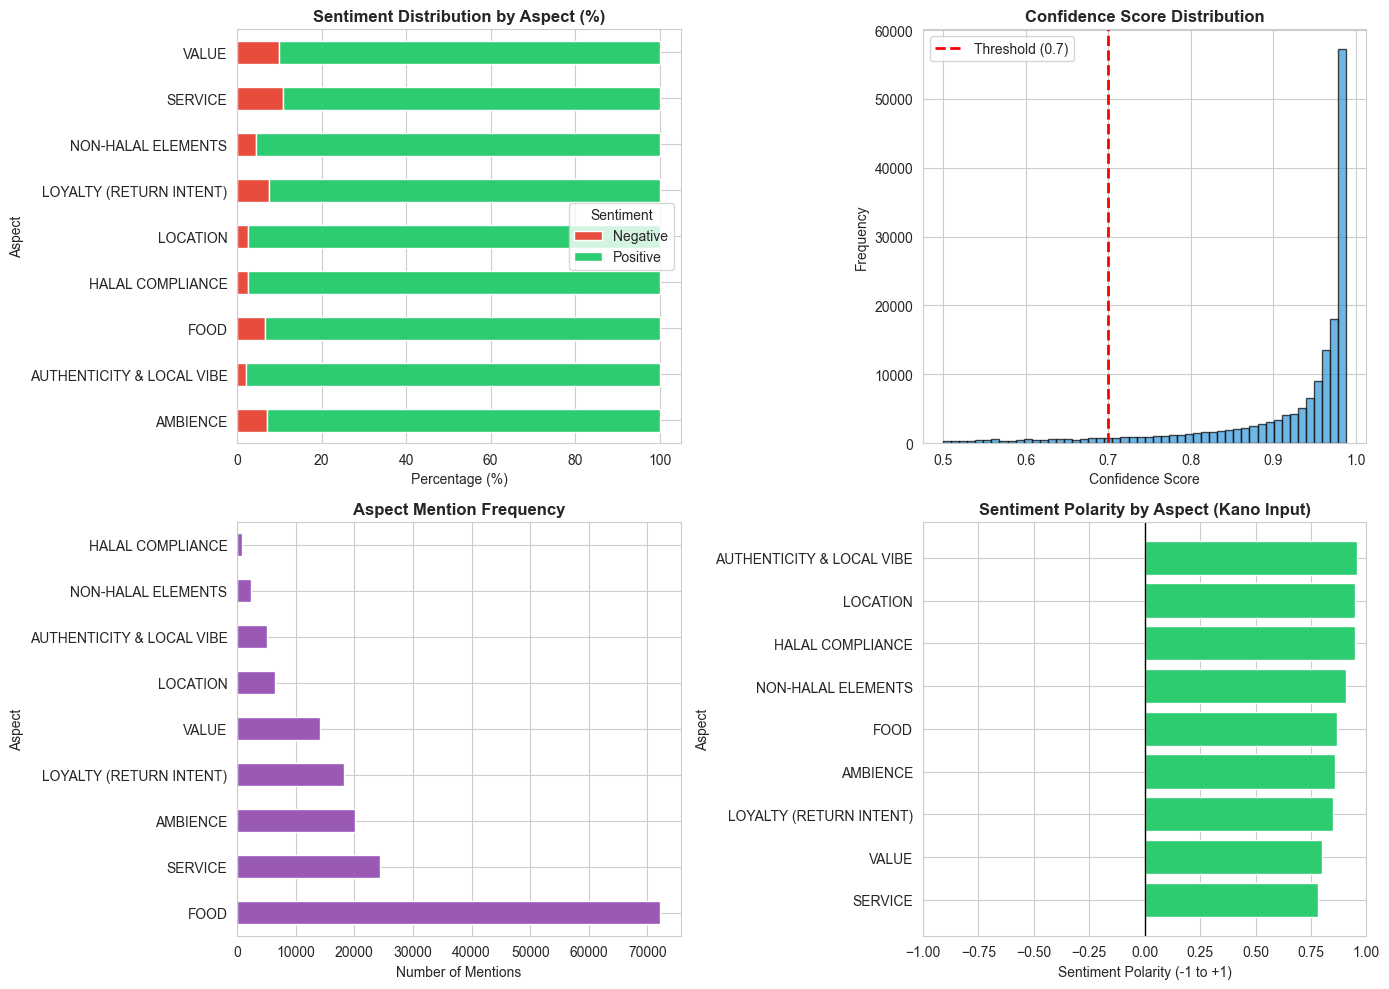


✓ Visualizations saved to: C:\Users\Ong Hui Ling\Dropbox\PC\Documents\Github\Aspect-Based-Sentiment-Analysis\Dataset\Output\sentiment_analysis_overview.png


In [164]:
# ==============================================================================
# Quick Visualizations for Sanity Checks
# ==============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Sentiment Distribution by Aspect
aspect_sentiment = df.groupby(['aspect', 'predicted_sentiment']).size().unstack(fill_value=0)
aspect_sentiment_pct = aspect_sentiment.div(aspect_sentiment.sum(axis=1), axis=0) * 100

ax1 = axes[0, 0]
aspect_sentiment_pct.plot(kind='barh', stacked=True, color=['#e74c3c', '#2ecc71'], ax=ax1)
ax1.set_title('Sentiment Distribution by Aspect (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Percentage (%)')
ax1.set_ylabel('Aspect')
ax1.legend(title='Sentiment', labels=['Negative', 'Positive'])

# 2. Confidence Score Distribution
ax2 = axes[0, 1]
ax2.hist(df['confidence'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
ax2.axvline(0.7, color='red', linestyle='--', linewidth=2, label=f'Threshold (0.7)')
ax2.set_title('Confidence Score Distribution', fontsize=12, fontweight='bold')
ax2.set_xlabel('Confidence Score')
ax2.set_ylabel('Frequency')
ax2.legend()

# 3. Aspect Mention Frequency
ax3 = axes[1, 0]
aspect_counts = df['aspect'].value_counts()
aspect_counts.plot(kind='barh', color='#9b59b6', ax=ax3)
ax3.set_title('Aspect Mention Frequency', fontsize=12, fontweight='bold')
ax3.set_xlabel('Number of Mentions')
ax3.set_ylabel('Aspect')

# 4. Sentiment Polarity by Aspect (for Kano Model)
ax4 = axes[1, 1]
kano_df_sorted = kano_df.sort_values('sentiment_polarity')
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in kano_df_sorted['sentiment_polarity']]
ax4.barh(kano_df_sorted['aspect'], kano_df_sorted['sentiment_polarity'], color=colors)
ax4.axvline(0, color='black', linewidth=1)
ax4.set_title('Sentiment Polarity by Aspect (Kano Input)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Sentiment Polarity (-1 to +1)')
ax4.set_ylabel('Aspect')
ax4.set_xlim(-1, 1)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'sentiment_analysis_overview.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Visualizations saved to: {os.path.join(output_dir, 'sentiment_analysis_overview.png')}")

# STAGE 6: State-Level Aggregation (For Government Strategic Planning)

In [165]:
# ==============================================================================
# State-Level Aggregation (Critical for Government Tourism Boards)
# ==============================================================================

print("\n" + "=" * 70)
print("STATE-LEVEL SENTIMENT AGGREGATION")
print("=" * 70)
print("\nWhy State-Level?")
print("  - Government tourism strategies operate at state level")
print("  - Allows regional benchmarking (which states excel/lag)")
print("  - Supports resource allocation decisions")
print("  - Macro dataset covers ALL states → comprehensive coverage")

# Group by state and aspect
state_agg = df.dropna(subset=['state']).groupby(['state', 'aspect']).agg(
    total_segments=('Segment', 'count'),
    num_positive=('predicted_sentiment_id', lambda x: (x == 1).sum()),
    num_negative=('predicted_sentiment_id', lambda x: (x == 0).sum()),
    avg_confidence=('confidence', 'mean'),
    high_confidence_count=('is_high_confidence', 'sum'),
    num_restaurants=('Restaurant_Name', 'nunique'),
).reset_index()

# Calculate percentages and sentiment score
state_agg['pct_positive'] = (state_agg['num_positive'] / state_agg['total_segments'] * 100).round(2)
state_agg['pct_negative'] = (state_agg['num_negative'] / state_agg['total_segments'] * 100).round(2)
state_agg['sentiment_score'] = (
    (state_agg['num_positive'] - state_agg['num_negative']) / state_agg['total_segments']
).round(4)
state_agg['avg_confidence'] = state_agg['avg_confidence'].round(4)
state_agg['pct_high_confidence'] = (
    state_agg['high_confidence_count'] / state_agg['total_segments'] * 100
).round(2)

# Sort by popularity (most discussed aspects per state)
state_agg = state_agg.sort_values(['state', 'total_segments'], ascending=[True, False])

# Output path
state_agg_path = os.path.join(output_dir, "state_level_summary.csv")
state_agg.to_csv(state_agg_path, index=False, encoding='utf-8-sig')

print(f"\n  ✓ State-level aggregation complete")
print(f"    Rows: {len(state_agg):,} (state × aspect combinations)")
print(f"    States covered: {state_agg['state'].nunique()}")
print(f"    Aspects per state: {state_agg.groupby('state').size().mean():.1f}")
print(f"    Saved to: {state_agg_path}")

print(f"\n  Top Negative Aspects by State:")
print("  " + "=" * 66)
for state in sorted(state_agg['state'].unique()):
    state_data = state_agg[state_agg['state'] == state].nlargest(3, 'pct_negative')
    if len(state_data) > 0:
        worst = state_data.iloc[0]
        print(f"  {state:<20}: {worst['aspect']:<25} ({worst['pct_negative']:>5.1f}% negative)")

print("=" * 70)



STATE-LEVEL SENTIMENT AGGREGATION

Why State-Level?
  - Government tourism strategies operate at state level
  - Allows regional benchmarking (which states excel/lag)
  - Supports resource allocation decisions
  - Macro dataset covers ALL states → comprehensive coverage

  ✓ State-level aggregation complete
    Rows: 144 (state × aspect combinations)
    States covered: 16
    Aspects per state: 9.0
    Saved to: C:\Users\Ong Hui Ling\Dropbox\PC\Documents\Github\Aspect-Based-Sentiment-Analysis\Dataset\Output\state_level_summary.csv

  Top Negative Aspects by State:
  Johor               : SERVICE                   ( 11.2% negative)
  Kedah               : SERVICE                   ( 11.3% negative)
  Kelantan            : SERVICE                   ( 14.2% negative)
  Kuala Lumpur        : VALUE                     (  9.9% negative)
  Labuan              : SERVICE                   ( 14.1% negative)
  Melaka              : VALUE                     (  8.9% negative)
  Negeri Sembilan  

# STAGE 7: Category-Level Aggregation (Restaurant Type Insights)

In [166]:
df['sub_category'].value_counts()

sub_category
other                    34554
chinese_restaurant       33197
hawker_street_food       19425
cafe                     17671
western_international    13774
fine_dining              12511
malay_restaurant          7484
seafood                   7482
bar_club                  6038
indian_restaurant         5763
chain_fast_food           4461
mamak                     1304
Name: count, dtype: int64

In [167]:
# ==============================================================================
# Category-Level Aggregation (Restaurant Type Performance)
# ==============================================================================

print("\n" + "=" * 70)
print("CATEGORY-LEVEL SENTIMENT AGGREGATION")
print("=" * 70)
print("\nWhy Category-Level?")
print("  - Compare performance across restaurant types (e.g., Mamak vs Fine Dining)")
print("  - Identify category-specific pain points")
print("  - Support category-specific improvement initiatives")
print("  - Benchmark category standards")

# Group by sub_category and aspect
category_agg = df.dropna(subset=['sub_category']).groupby(['sub_category', 'aspect']).agg(
    total_segments=('Segment', 'count'),
    num_positive=('predicted_sentiment_id', lambda x: (x == 1).sum()),
    num_negative=('predicted_sentiment_id', lambda x: (x == 0).sum()),
    avg_confidence=('confidence', 'mean'),
    high_confidence_count=('is_high_confidence', 'sum'),
    num_restaurants=('Restaurant_Name', 'nunique'),
).reset_index()

# Calculate percentages and sentiment score
category_agg['pct_positive'] = (category_agg['num_positive'] / category_agg['total_segments'] * 100).round(2)
category_agg['pct_negative'] = (category_agg['num_negative'] / category_agg['total_segments'] * 100).round(2)
category_agg['sentiment_score'] = (
    (category_agg['num_positive'] - category_agg['num_negative']) / category_agg['total_segments']
).round(4)
category_agg['avg_confidence'] = category_agg['avg_confidence'].round(4)
category_agg['pct_high_confidence'] = (
    category_agg['high_confidence_count'] / category_agg['total_segments'] * 100
).round(2)

# Sort by category and segments
category_agg = category_agg.sort_values(['sub_category', 'total_segments'], ascending=[True, False])

# Output path
category_agg_path = os.path.join(output_dir, "category_level_summary.csv")
category_agg.to_csv(category_agg_path, index=False, encoding='utf-8-sig')

print(f"\n  ✓ Category-level aggregation complete")
print(f"    Rows: {len(category_agg):,} (category × aspect combinations)")
print(f"    Categories: {category_agg['sub_category'].nunique()}")

print(f"\n  Categories covered:")
for cat in sorted(category_agg['sub_category'].unique()):
    cat_data = category_agg[category_agg['sub_category'] == cat]
    total_seg = cat_data['total_segments'].sum()
    num_rest = cat_data['num_restaurants'].sum()
    print(f"    {cat:<30}: {total_seg:>6,} segments from {num_rest:>4,} restaurants")

print(f"\n  Category Performance (avg sentiment across all aspects):")
print("  " + "=" * 60)
cat_performance = category_agg.groupby('sub_category').agg(
    avg_sentiment_score=('sentiment_score', 'mean'),
    avg_pct_positive=('pct_positive', 'mean'),
    total_segments=('total_segments', 'sum'),
).sort_values('avg_sentiment_score', ascending=False)

for cat, row in cat_performance.iterrows():
    print(f"  {cat:<30}: {row['avg_sentiment_score']:>7.4f} (+{row['avg_pct_positive']:>5.1f}%) [{int(row['total_segments']):>6,} segments]")

print(f"\n  Saved to: {category_agg_path}")
print("=" * 70)



CATEGORY-LEVEL SENTIMENT AGGREGATION

Why Category-Level?
  - Compare performance across restaurant types (e.g., Mamak vs Fine Dining)
  - Identify category-specific pain points
  - Support category-specific improvement initiatives
  - Benchmark category standards

  ✓ Category-level aggregation complete
    Rows: 108 (category × aspect combinations)
    Categories: 12

  Categories covered:
    bar_club                      :  6,038 segments from 1,013 restaurants
    cafe                          : 17,671 segments from 2,587 restaurants
    chain_fast_food               :  4,461 segments from  715 restaurants
    chinese_restaurant            : 33,197 segments from 5,165 restaurants
    fine_dining                   : 12,511 segments from 1,842 restaurants
    hawker_street_food            : 19,425 segments from 3,142 restaurants
    indian_restaurant             :  5,763 segments from  809 restaurants
    malay_restaurant              :  7,484 segments from 1,176 restaurants
    ma

# STAGE 7: State × Category Matrix (Strategic Heatmap Input)

In [168]:
# ==============================================================================
# State × Category Matrix (For Government Dashboard)
# ==============================================================================

print("\n" + "=" * 70)
print("STATE × CATEGORY MATRIX AGGREGATION")
print("=" * 70)
print("\nWhy State × Category?")
print("  - See which restaurant types perform best in each state")
print("  - Identify regional disparities (e.g., Mamak weak in State X)")
print("  - Supports policy targeting (e.g., 'improve Mamak service in Johor')")
print("  - Enable Power BI heatmap visualizations")

# Group by state, sub_category, and aspect
state_cat_agg = df.dropna(subset=['state', 'sub_category']).groupby(
    ['state', 'sub_category', 'aspect']
).agg(
    total_segments=('Segment', 'count'),
    num_positive=('predicted_sentiment_id', lambda x: (x == 1).sum()),
    num_negative=('predicted_sentiment_id', lambda x: (x == 0).sum()),
    avg_confidence=('confidence', 'mean'),
    num_restaurants=('Restaurant_Name', 'nunique'),
).reset_index()

# Calculate metrics
state_cat_agg['pct_positive'] = (state_cat_agg['num_positive'] / state_cat_agg['total_segments'] * 100).round(2)
state_cat_agg['pct_negative'] = (state_cat_agg['num_negative'] / state_cat_agg['total_segments'] * 100).round(2)
state_cat_agg['sentiment_score'] = (
    (state_cat_agg['num_positive'] - state_cat_agg['num_negative']) / state_cat_agg['total_segments']
).round(4)
state_cat_agg['avg_confidence'] = state_cat_agg['avg_confidence'].round(4)

# Sort for readability
state_cat_agg = state_cat_agg.sort_values(['state', 'sub_category', 'total_segments'], ascending=[True, True, False])

# Output path
state_cat_path = os.path.join(output_dir, "state_category_summary.csv")
state_cat_agg.to_csv(state_cat_path, index=False, encoding='utf-8-sig')

print(f"\n  ✓ State × Category aggregation complete")
print(f"    Rows: {len(state_cat_agg):,} (state × category × aspect)")
print(f"    States: {state_cat_agg['state'].nunique()}")
print(f"    Categories: {state_cat_agg['sub_category'].nunique()}")
print(f"    Total combinations: {state_cat_agg['state'].nunique() * state_cat_agg['sub_category'].nunique()}")
print(f"    Saved to: {state_cat_path}")

# Summary: Best and Worst State-Category combinations
print(f"\n  TOP 10 Best Performing (State, Category) Combinations:")
print("  " + "=" * 60)
best_combos = state_cat_agg.groupby(['state', 'sub_category']).agg({
    'sentiment_score': 'mean',
    'total_segments': 'sum',
    'num_restaurants': 'sum'
}).sort_values('sentiment_score', ascending=False).head(10)

for (state, cat), row in best_combos.iterrows():
    print(f"  {state:<20} × {cat:<20}: {row['sentiment_score']:>7.4f} ({int(row['total_segments']):>6,} segs)")

print(f"\n  TOP 10 Worst Performing (State, Category) Combinations:")
print("  " + "=" * 60)
worst_combos = state_cat_agg.groupby(['state', 'sub_category']).agg({
    'sentiment_score': 'mean',
    'total_segments': 'sum',
    'num_restaurants': 'sum'
}).sort_values('sentiment_score', ascending=True).head(10)

for (state, cat), row in worst_combos.iterrows():
    print(f"  {state:<20} × {cat:<20}: {row['sentiment_score']:>7.4f} ({int(row['total_segments']):>6,} segs)")

print("=" * 70)



STATE × CATEGORY MATRIX AGGREGATION

Why State × Category?
  - See which restaurant types perform best in each state
  - Identify regional disparities (e.g., Mamak weak in State X)
  - Supports policy targeting (e.g., 'improve Mamak service in Johor')
  - Enable Power BI heatmap visualizations

  ✓ State × Category aggregation complete
    Rows: 1,518 (state × category × aspect)
    States: 16
    Categories: 12
    Total combinations: 192
    Saved to: C:\Users\Ong Hui Ling\Dropbox\PC\Documents\Github\Aspect-Based-Sentiment-Analysis\Dataset\Output\state_category_summary.csv

  TOP 10 Best Performing (State, Category) Combinations:
  Labuan               × indian_restaurant   :  1.0000 (    49 segs)
  Labuan               × seafood             :  1.0000 (    37 segs)
  Perlis               × mamak               :  1.0000 (    30 segs)
  Putrajaya            × bar_club            :  1.0000 (   125 segs)
  Terengganu           × indian_restaurant   :  1.0000 (    27 segs)
  Melaka      